# DataCamp Certification Case Study

### Project Brief

Congratulations, you have landed your first job as a data scientist at National Accessibility! National Accessibility currently installs wheelchair ramps for office buildings and schools. However, the marketing manager wants the company to start installing ramps for event venues as well. According to a new survey, approximately 40% of event venues are not wheelchair accessible. However, it is not easy to know whether a venue already has a ramp installed. 

The marketing manager would like to know whether you can develop a model to predict whether an event venue has a wheelchair ramp. To help you with this, he has provided you with a dataset of London venues. This data includes whether the venue has a ramp.

It is a waste of time to contact venues that already have a ramp installed, and it also looks bad for the company. Therefore, it is especially important to exclude locations that already have a ramp. Ideally, at least two-thirds of venues predicted to be without a ramp should not have a ramp. 

You will need to present your findings in two formats:
- First, you will need to present your findings to the marketing manager via a 10 minute oral presentation. The owner has no technical data science background. 
- You will also need to submit a technical report to your manager, who does have a strong technical data science background.

The data you will use for this analysis can be accessed here: `"data/event_venues.csv"`

In [1]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!


##### Index
1. Data Overview
2. Exploratory Data Analysis
3. Model Developement
4. Outcomes

#### Data Overview
___

In [2]:
# Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import metrics
import keras
from keras.models import Sequential
from keras.layers.core import Dense

2022-02-01 16:22:39.373067: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-01 16:22:39.373100: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# Data Overview

df = pd.read_csv("data/event_venues.csv")
df.head(10)

,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
0,techspace aldgate east,False,0,True,False,35.045455,0,112.715867,False,False
1,green rooms hotel,True,1,True,False,40.000000,120,80.000000,True,False
2,148 leadenhall street,False,0,True,False,35.045455,0,112.715867,False,False
3,conway hall,False,0,True,False,35.045455,60,60.000000,False,False
4,gridiron building,False,0,True,False,35.045455,0,112.715867,False,False
5,kimpton fitzroy london,True,1,True,False,6.000000,0,112.715867,True,False
6,lloyds avenue,False,0,True,False,35.045455,0,112.715867,False,False
7,public space | members-style bar & dining,True,1,True,False,35.045455,200,112.715867,False,False
8,16 old queen street,False,0,True,False,35.045455,0,112.715867,False,False
9,siorai bar,True,1,True,False,35.045455,180,20.000000,True,False


In [4]:
# Clean Bool format so process

def bool_mapper (df, column):
    df[column] = df[column].map({True: 1,False: 0})
    return df

bool_mapper (df, 'supervenue')
bool_mapper (df, 'Loud music / events')
bool_mapper (df, 'Promoted / ticketed events')
bool_mapper (df, 'Wheelchair accessible')
bool_mapper (df, 'Wi-Fi')

,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
0,techspace aldgate east,0,0,1,0,35.045455,0,112.715867,0,0
1,green rooms hotel,1,1,1,0,40.000000,120,80.000000,1,0
2,148 leadenhall street,0,0,1,0,35.045455,0,112.715867,0,0
3,conway hall,0,0,1,0,35.045455,60,60.000000,0,0
4,gridiron building,0,0,1,0,35.045455,0,112.715867,0,0
...,...,...,...,...,...,...,...,...,...,...
3905,the hurlingham club,1,1,1,0,40.000000,450,450.000000,0,1
3906,"landmark - aldgate, london",0,0,1,0,28.000000,0,28.000000,0,1
3907,ortus conference and events venue,0,1,1,0,13.000000,20,20.000000,0,1
3908,30 euston square,0,1,1,0,8.000000,20,20.000000,0,1


##### Train - test split

In [5]:
# Split X, y

X = df.drop(['Wheelchair accessible', 'venue_name'], axis = 1)
y = df['Wheelchair accessible']

# Split train test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Dataset Merged for exploration
X['Wheelchair'] = y
data = X.copy()

# Print
print ('X_train data set lenght:', len(X_train))
print ('X_test data set lenght:', len(X_test))
print ('y_train data set lenght:', len(y_train))
print ('y_test data set lenght:', len(y_test))

X_train data set lenght: 2619
X_test data set lenght: 1291
y_train data set lenght: 2619
y_test data set lenght: 1291


#### Exploratory Data Analysis
___

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate.

##### Data Composition

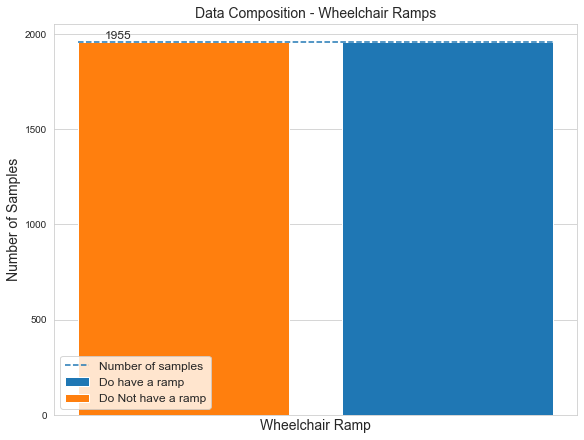

In [6]:
# Wheelchair access
sns.set_style('whitegrid')

# Declare axes
figg = plt.figure(figsize = (8, 6), constrained_layout = True)
ax = figg.subplots()

# Values

def plot_bars (col):
    return plt.bar(data['Wheelchair'][data['Wheelchair']==col ], height = data['Wheelchair'].value_counts() [col] )

plot_bars(1)
plot_bars(0)

# Parametres
plt.xticks(np.arange(250,2500,500))
plt.yticks(np.arange(0,2500,500))
plt.xlabel("Wheelchair Ramp", fontsize = 14)
plt.ylabel("Number of Samples", fontsize = 14)
plt.hlines(1955, -0.4, 1.4, linestyles = 'dashed')
plt.annotate('1955',(-0.3,1975), size = 12)
plt.title('Data Composition - Wheelchair Ramps', fontsize = 14)
plt.legend(['Number of samples','Do have a ramp','Do Not have a ramp'], loc = 3, fontsize = 12)

# Show
plt.show()

Our data set has the same numbers of samples that compose the sample are similar for both cases (1955)

##### Understanding the data set - Variable correlations

In [7]:
# Correlation matrix
corr_matrix = data.corr()

# print
print("Wheelchair ramp correlation: \n")
print(corr_matrix["Wheelchair"].sort_values(ascending=False))

Wheelchair ramp correlation: 

Wheelchair                    1.000000
Promoted / ticketed events    0.162369
Venue provides alcohol        0.138560
max_standing                  0.137144
Theatre_max                   0.091873
Wi-Fi                         0.083875
Loud music / events           0.043190
U-Shaped_max                  0.024257
supervenue                   -0.101503
Name: Wheelchair, dtype: float64


According to this data, variables which seems to be predictor are **Promoted / ticketed events** (0.16), **Venue provides alcohol** (0.13), **max_standing**  (0.137), and having a negative correlation, **supervenue** (-0.1).

A table showing the overall wheelchain ramp correlation within each variable is set out below:

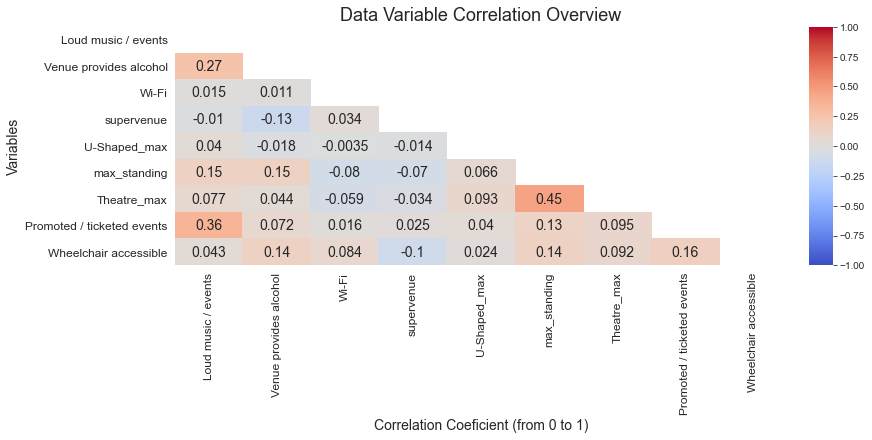

In [8]:
# Heatmap
figg = plt.figure(figsize = (12,6), constrained_layout = True)
ax = figg.subplots()

# For cleaner index and ticks
df_heat = df.copy()

# Plot Corpus
upp_mat = np.triu(df.corr())

sns.heatmap(df_heat.corr(), vmin = -1, vmax = +1, annot = True,
            cmap = "coolwarm",annot_kws = {'size':14}, mask = upp_mat)

# Appareance
plt.title("Data Variable Correlation Overview", fontsize = 18)
plt.ylabel("Variables", fontsize = 14)
plt.yticks(fontsize = 12)
plt.xlabel("Correlation Coeficient (from 0 to 1)", fontsize = 14)
plt.xticks(rotation = 90, fontsize = 12)

# Show
plt.show()

##### Correlation p-significance

In [9]:
# p-value 
p_list = []

def p_value_wchair(cols):
    for col in cols:
        r, p = stats.pearsonr(data['Wheelchair'], data[col])
        p_list.append( p )
        print('Variable', col, 'p value: ', p)
        
p_value_wchair(data.columns[1:-1])

Variable Venue provides alcohol p value:  3.2202991977858834e-18
Variable Wi-Fi p value:  1.5022795683491803e-07
Variable supervenue p value:  1.9991616526903284e-10
Variable U-Shaped_max p value:  0.1293853790383352
Variable max_standing p value:  7.078254512588652e-18
Variable Theatre_max p value:  8.655567380058508e-09
Variable Promoted / ticketed events p value:  1.6549428075424375e-24


A table showing the overall p-correlation within each variable is set out below:

[]

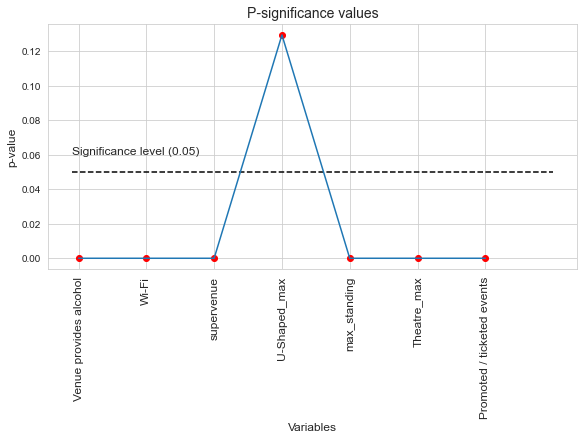

In [10]:
# Declare axes
figg = plt.figure(figsize = (8, 6), constrained_layout = True)
ax = figg.subplots()

# corpus
plt.plot(p_list)
plt.scatter(data.columns[1:-1], p_list, color = 'r', zorder = 2)


# lines
plt.hlines(0.05, -0.1, 7, linestyles = 'dashed', color = 'black')
plt.annotate('Significance level (0.05)',(-0.1,0.06), size = 12)

# params
plt.title("P-significance values", fontsize = 14)
plt.xticks(range(0,len(data.columns[1:-1])), data.columns[1:-1], rotation = 90, fontsize = 12)
plt.ylabel("p-value", fontsize = 12)
plt.xlabel("Variables", fontsize = 12)

# plot
plt.plot()

According to p-value, all variables except 'U-shaped_max' are **significatly correlated** to the target variable.

In [11]:
# Drop the uncorrelated variable
X_train = X_train.drop(['U-Shaped_max'], axis=1)
X_test = X_test.drop(['U-Shaped_max'], axis=1)

#### Model Developement
___

##### Neural Network

A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates.

In [12]:
# Neural Network

model = Sequential()
model.add(Dense(32, input_dim=7, activation='relu'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

2022-02-01 16:22:49.425734: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-01 16:22:49.426007: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-01 16:22:49.426026: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-01 16:22:49.426065: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (0257d9e8-2280-40ff-82af-d5fa5008f2b2): /proc/driver/nvidia/version does not exist
2022-02-01 16:22:49.426343: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations

In [13]:
# Model compilation
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

In [14]:
# Model fit
model.fit(X_train, y_train, epochs=25)

2022-02-01 16:22:49.508497: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-01 16:22:49.508963: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499995000 Hz


Epoch 1/25
82/82 [==============================] - 0s 844us/step - loss: 0.2565 - binary_accuracy: 0.5302
Epoch 2/25
82/82 [==============================] - 0s 1ms/step - loss: 0.2392 - binary_accuracy: 0.6133
Epoch 3/25
82/82 [==============================] - 0s 1ms/step - loss: 0.2370 - binary_accuracy: 0.6132
Epoch 4/25
82/82 [==============================] - 0s 1ms/step - loss: 0.2363 - binary_accuracy: 0.6142
Epoch 5/25
82/82 [==============================] - 0s 1ms/step - loss: 0.2379 - binary_accuracy: 0.6042
Epoch 6/25
82/82 [==============================] - 0s 1ms/step - loss: 0.2341 - binary_accuracy: 0.6269
Epoch 7/25
82/82 [==============================] - 0s 779us/step - loss: 0.2360 - binary_accuracy: 0.6089
Epoch 8/25
82/82 [==============================] - 0s 731us/step - loss: 0.2328 - binary_accuracy: 0.6302
Epoch 9/25
82/82 [==============================] - 0s 959us/step - loss: 0.2361 - binary_accuracy: 0.6192
Epoch 10/25
82/82 [============================

##### Model accuracy

In [15]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

41/41 [==============================] - 0s 515us/step - loss: 0.2330 - binary_accuracy: 0.6166

binary_accuracy: 61.66%


In [16]:
X_results = X.drop(['Wheelchair', 'U-Shaped_max'], axis = 1)

Text(0.5, 16.0, 'Predicted label')

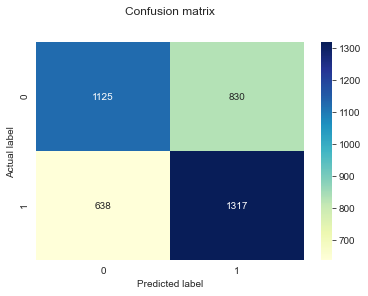

In [17]:
y_pred = np.round(model.predict(X_results))

cnf_matrix = metrics.confusion_matrix(y, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [18]:
df['Wheelchair accessible'].value_counts()/3

0    651.666667
1    651.666667
Name: Wheelchair accessible, dtype: float64

Its score **has achieved the +2/3 requirement** TP 1317, FP 638 (< 651 limit error allowed). 

Based on:
"[...]at least two-thirds of venues predicted to be without a ramp should not have a ramp."

##### Model saving

In [19]:
# serializar el modelo a JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serializar los pesos a HDF5
model.save_weights("wchair_predictor.h5")
print("Modelo Guardado!")

Modelo Guardado!


##### Model testing

In [24]:
df['prediction'] = np.round(model.predict(df.drop(['Wheelchair accessible','venue_name','U-Shaped_max'], axis = 1))).astype(int)
df

,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible,prediction
0,techspace aldgate east,0,0,1,0,35.045455,0,112.715867,0,0,0
1,green rooms hotel,1,1,1,0,40.000000,120,80.000000,1,0,1
2,148 leadenhall street,0,0,1,0,35.045455,0,112.715867,0,0,0
3,conway hall,0,0,1,0,35.045455,60,60.000000,0,0,1
4,gridiron building,0,0,1,0,35.045455,0,112.715867,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3905,the hurlingham club,1,1,1,0,40.000000,450,450.000000,0,1,1
3906,"landmark - aldgate, london",0,0,1,0,28.000000,0,28.000000,0,1,0
3907,ortus conference and events venue,0,1,1,0,13.000000,20,20.000000,0,1,1
3908,30 euston square,0,1,1,0,8.000000,20,20.000000,0,1,1
